In [0]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd

diabetes = load_diabetes()

In [0]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [0]:
from sklearn.model_selection import train_test_split

target = diabetes['target']
data = (df.s5).to_numpy()

# train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=21)

In [0]:
#train
a = pd.DataFrame(x_train, columns=['input'])
b = pd.DataFrame(y_train, columns=['target'])
c = pd.concat([a, b], axis=1)
#test
d = pd.DataFrame(x_valid, columns=['input'])
e = pd.DataFrame(y_valid, columns=['target'])
f = pd.concat([d, e], axis=1)

#train
df = spark.createDataFrame(c)
#test
test_df = spark.createDataFrame(f)

In [0]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

#train
assembler=VectorAssembler(inputCols=['input'],outputCol='features')
output=assembler.transform(df)

#test
assembler=VectorAssembler(inputCols=['input'],outputCol='features')
test_data=assembler.transform(test_df)

In [0]:
#import LinearRegression library
from pyspark.ml.regression import LinearRegression
#creating an object of class LinearRegression
#object takes features and label as input arguments
ship_lr=LinearRegression(featuresCol='features',labelCol='target')
#pass train_data to train model
trained_ship_model=ship_lr.fit(output)
#evaluating model trained for Rsquared error
ship_results=trained_ship_model.evaluate(output)

# Summarize the model over the training set and print out some metrics
trainingSummary = trained_ship_model.summary

In [0]:
unlabeled_data=test_data.select('features')
predictions=trained_ship_model.transform(unlabeled_data)
pred = predictions.select('prediction')
pred_array = np.array(pred.collect())

### (1) 선택 입력 변수 : (s5) ltg, lamotrigine

RMSE: 63.017828
Rsquared Error : 0.33872749074909814
Coefficients:  [961.3845101084851]


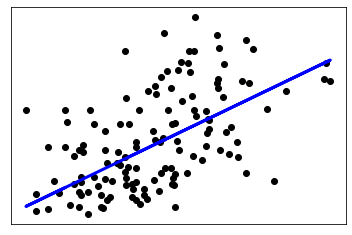

In [0]:
import matplotlib.pyplot as plt

print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print('Rsquared Error :', ship_results.r2)
print('Coefficients: ', trained_ship_model.coefficients)

# Plot outputs
plt.scatter(x_valid, y_valid, color="black")
plt.plot(x_valid, pred_array, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()